<a href="https://colab.research.google.com/github/dkd99/Cardiovascular-Risk-prediction/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.Variables

> Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.
Data Description

> Demographic:

> • Sex: male or female("M" or "F")

> • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

>Behavioral

> • is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

> • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

> Medical( history)

> • BP Meds: whether or not the patient was on blood pressure medication (Nominal)


> • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

> • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

> • Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

> • Tot Chol: total cholesterol level (Continuous)

> • Sys BP: systolic blood pressure (Continuous)

> • Dia BP: diastolic blood pressure (Continuous)

> • BMI: Body Mass Index (Continuous)

> • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)

> • Glucose: glucose level (Continuous)

> Predict variable (desired target)

> • 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score,recall_score,precision_score,classification_report
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/drive/MyDrive/csv files/data_cardiovascular_risk.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.shape

(3390, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [9]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
continous_features=['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

In [12]:
nominal_features=[i for i in df.columns.tolist() if i not in (continous_features+['id']) ]

In [13]:
nominal_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [14]:
numerical_features=df.describe().columns.tolist()

In [15]:
for i in nominal_features:
  print(f'value count for {i} is :\n',df[i].value_counts())

value count for education is :
 1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
value count for sex is :
 F    1923
M    1467
Name: sex, dtype: int64
value count for is_smoking is :
 NO     1703
YES    1687
Name: is_smoking, dtype: int64
value count for BPMeds is :
 0.0    3246
1.0     100
Name: BPMeds, dtype: int64
value count for prevalentStroke is :
 0    3368
1      22
Name: prevalentStroke, dtype: int64
value count for prevalentHyp is :
 0    2321
1    1069
Name: prevalentHyp, dtype: int64
value count for diabetes is :
 0    3303
1      87
Name: diabetes, dtype: int64
value count for TenYearCHD is :
 0    2879
1     511
Name: TenYearCHD, dtype: int64


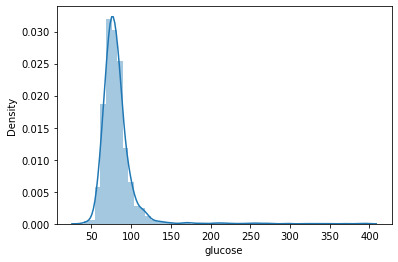

In [16]:
sns.distplot(df['glucose'])

In [17]:
df['glucose'].isnull().sum()

304

In [18]:
df['glucose']=df['glucose'].fillna(df['glucose'].median())

In [19]:
df['glucose'].isnull().sum()

0

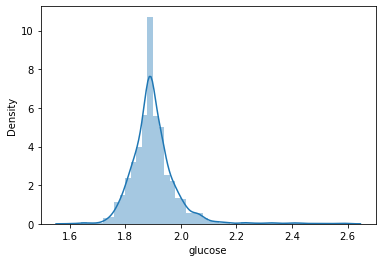

In [20]:
sns.distplot(np.log10(df['glucose']))

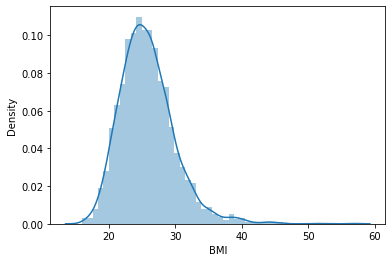

In [21]:
sns.distplot(df['BMI'])

In [22]:
df['BMI'].isnull().sum()

14

In [23]:
df['BMI']=df['BMI'].fillna(df['BMI'].median())

In [24]:
df['BMI'].isnull().sum()

0

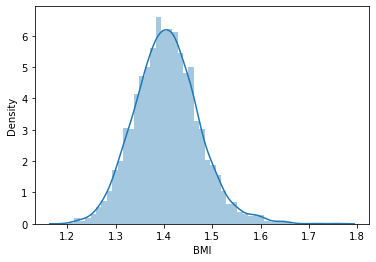

In [25]:
sns.distplot(np.log10(df['BMI']))

In [26]:
df['glucose'].isnull().sum()

0

In [27]:
len(df[df['cigsPerDay']==0]['cigsPerDay'])

1703

In [28]:
len(df[df['cigsPerDay']!=0]['cigsPerDay'])

1687

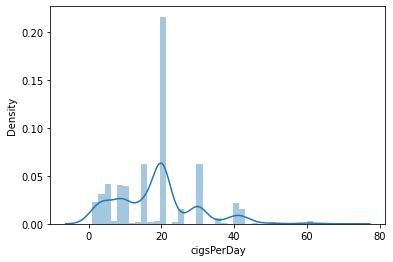

In [29]:
sns.distplot(df[df['cigsPerDay']!=0]['cigsPerDay'])

In [30]:
df['cigsPerDay']=df['cigsPerDay'].fillna(0)

In [31]:
df['cigsPerDay'].isnull().sum()

0

In [32]:
df[df['is_smoking']=='NO']['cigsPerDay'].mean()

0.0

In [33]:
df['education']=df['education'].fillna(1)

In [34]:
df['education'].isnull().sum()

0

In [35]:
df['BPMeds']=df['BPMeds'].fillna(0.0)

In [36]:
df['BPMeds'].isnull().sum()

0

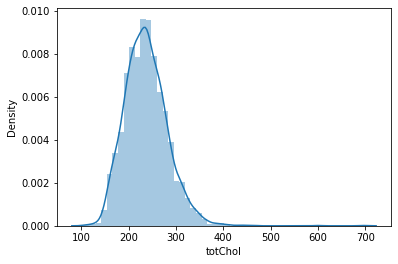

In [37]:
sns.distplot(df['totChol'])

In [38]:
df['totChol']=df['totChol'].fillna(df['totChol'].median())

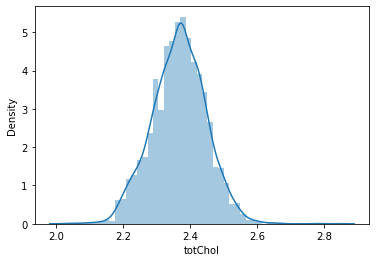

In [39]:
sns.distplot(np.log10(df['totChol']))

In [40]:
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())

In [41]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

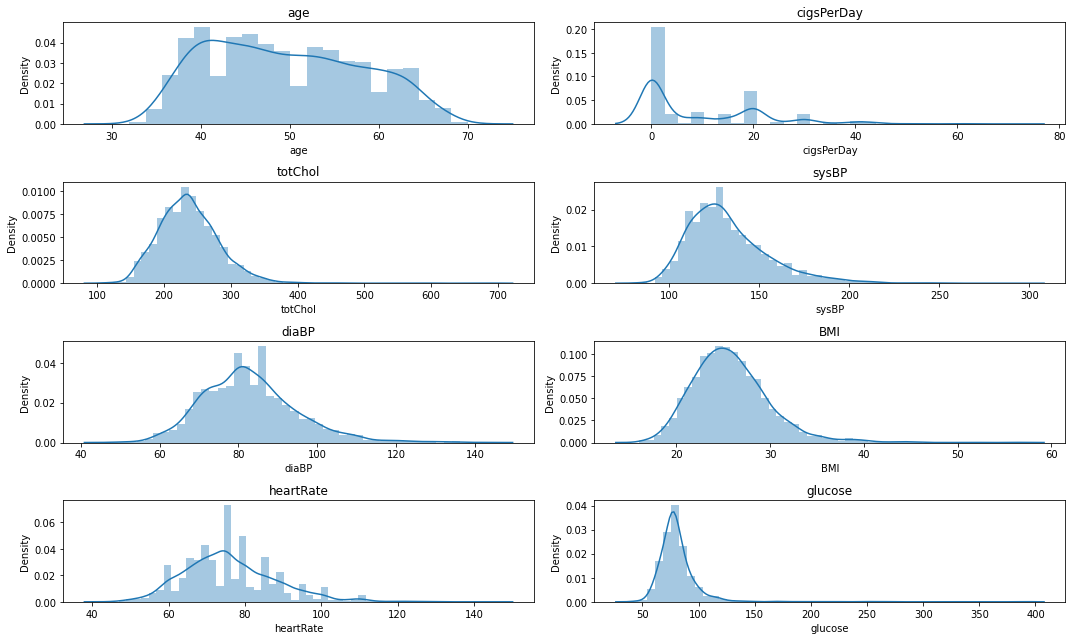

In [42]:
n=1
plt.figure(figsize=(15,9))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()
 


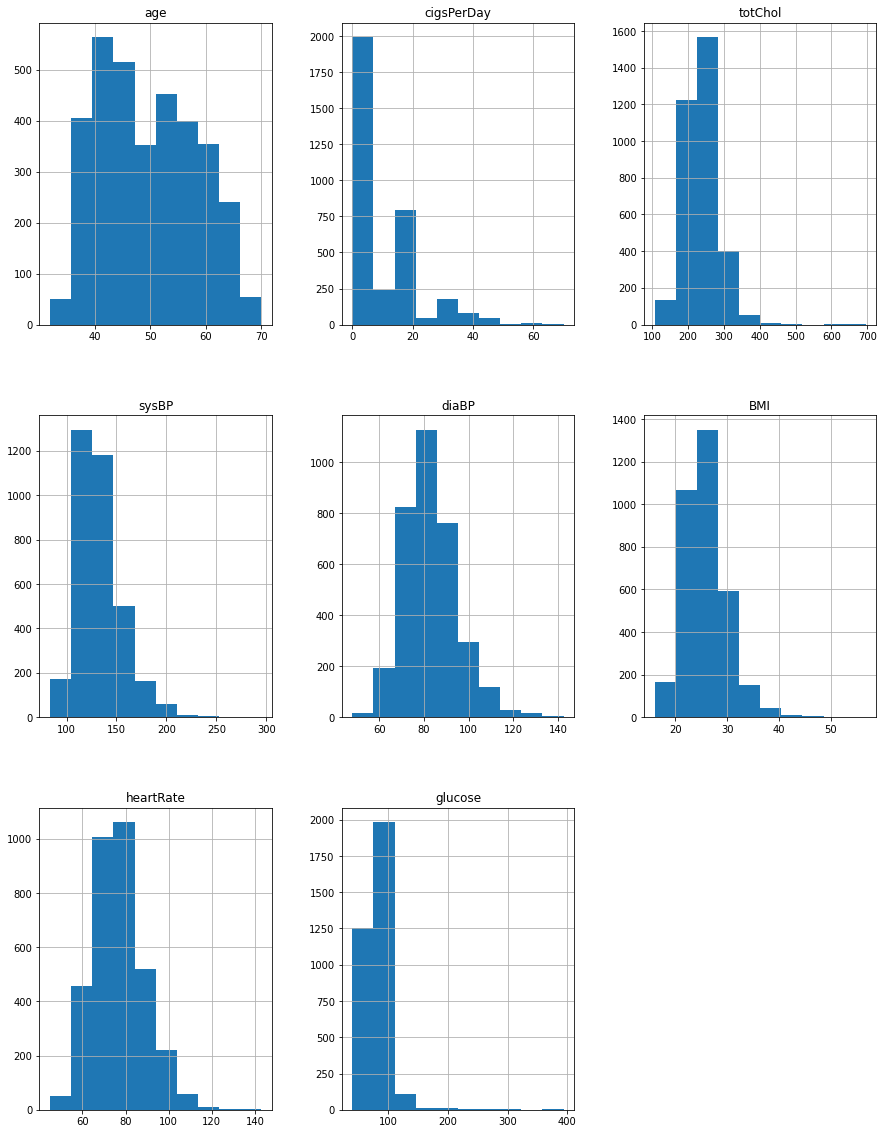

In [43]:
# understanding distribution of data before imputation
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[continous_features].hist(ax = ax)
plt.show()

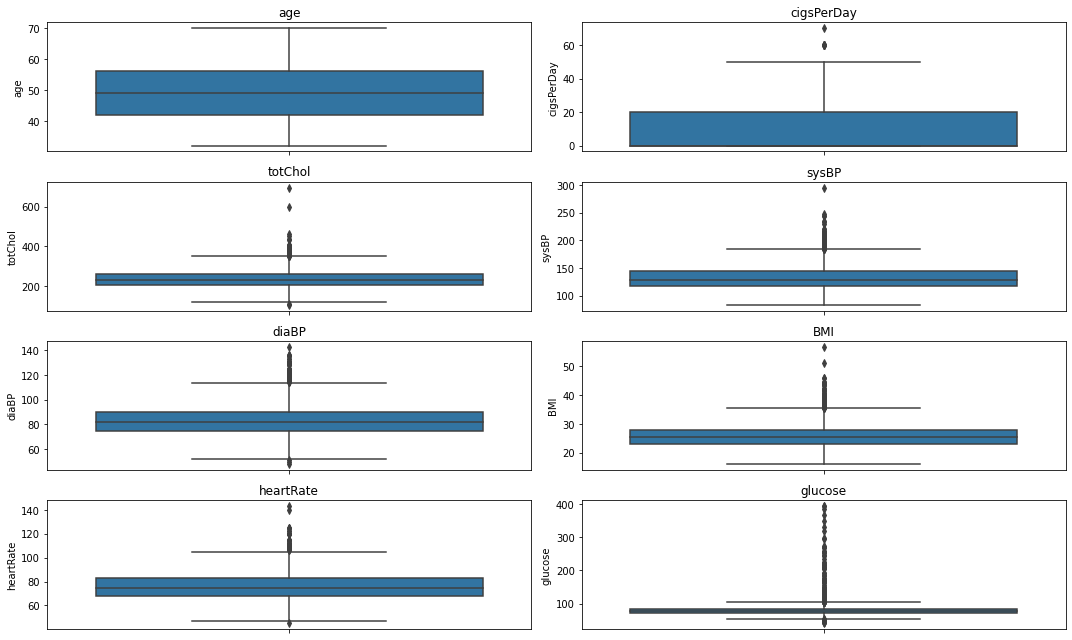

In [44]:
n=1
plt.figure(figsize=(15,9))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.boxplot(y=df[i])
  plt.title(i)
  plt.tight_layout()

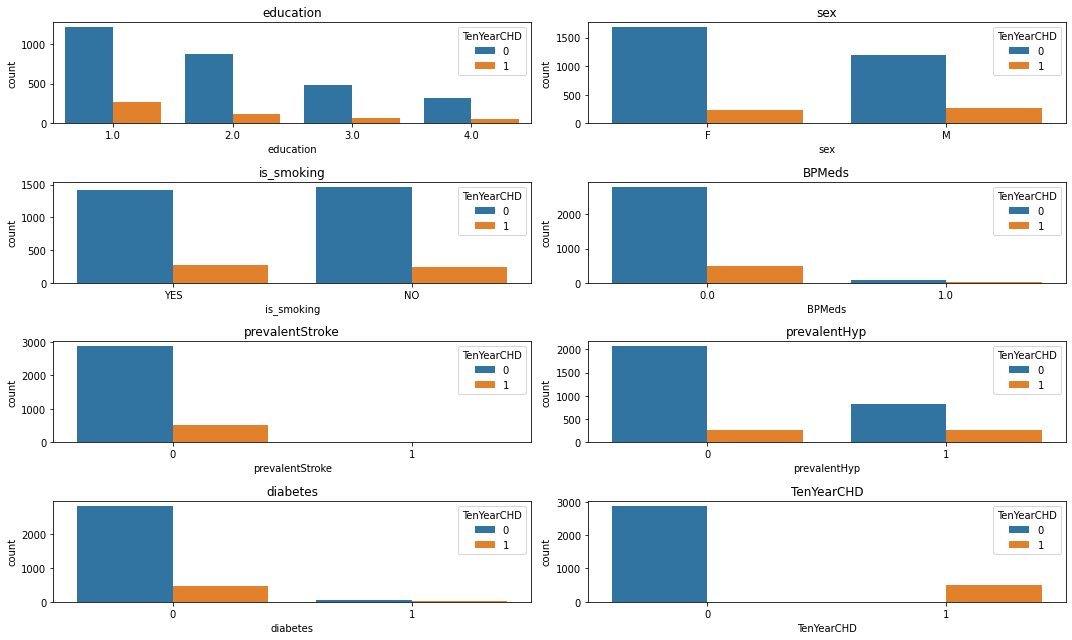

In [45]:
n=1
plt.figure(figsize=(15,9))
for i in nominal_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.countplot(x=i,hue='TenYearCHD',data=df)
  plt.title(i)
  plt.tight_layout()

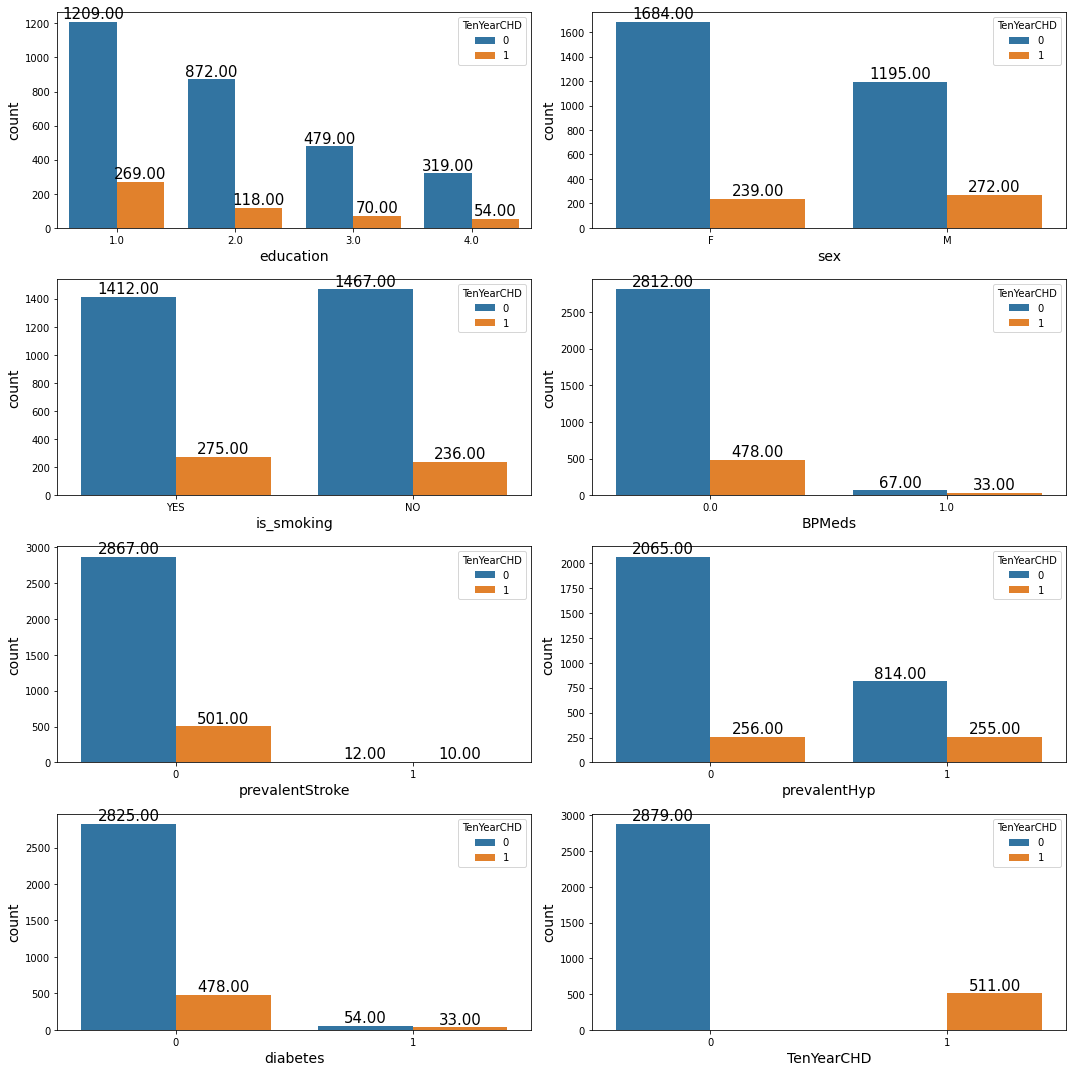

In [46]:
n=1
# Defining the plot size
plt.figure(figsize=(15, 15))
for i in nominal_features:
  plt.subplot(4,2,n)
  n=n+1
  

  # Defining the values for x-axis, y-axis
  # and from which dataframe the values are to be picked
  plots = sns.countplot(x=i, hue="TenYearCHD", data=df)

  # Iterrating over the bars one-by-one
  for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
	  plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

  # Setting the label for x-axis
  plt.xlabel(i, size=14)

  # Setting the label for y-axis
  plt.ylabel('count', size=14)
  plt.tight_layout()


<Figure size 1080x1080 with 0 Axes>

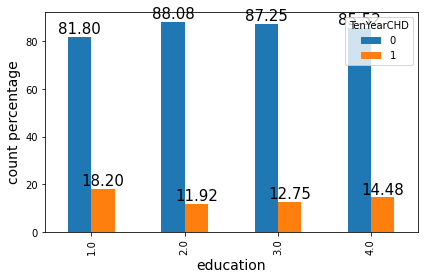

<Figure size 1080x1080 with 0 Axes>

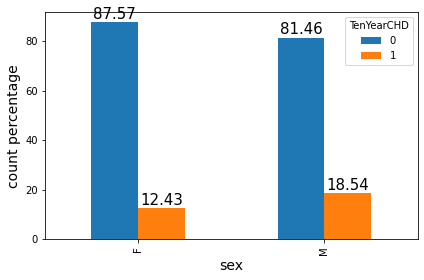

<Figure size 1080x1080 with 0 Axes>

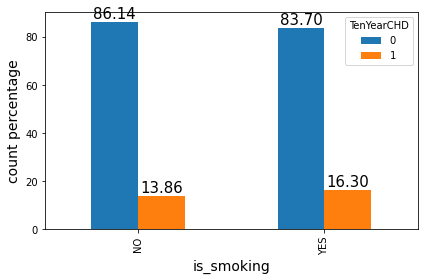

<Figure size 1080x1080 with 0 Axes>

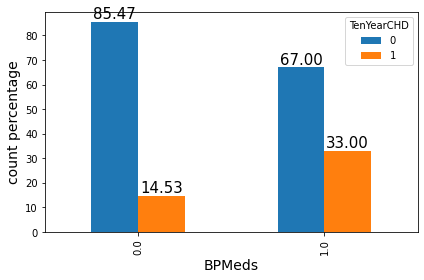

<Figure size 1080x1080 with 0 Axes>

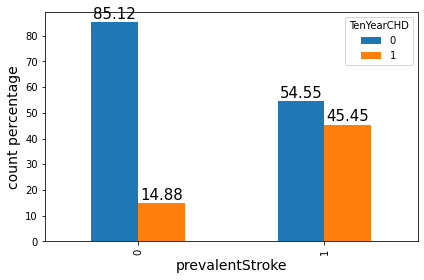

<Figure size 1080x1080 with 0 Axes>

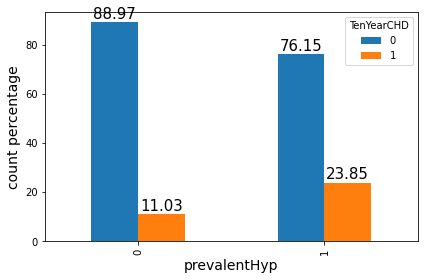

<Figure size 1080x1080 with 0 Axes>

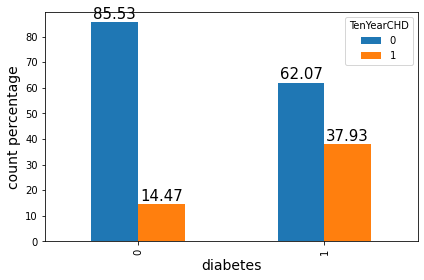

In [48]:
for i in nominal_features[:7]:
  
  plt.figure(figsize=(15, 15))
  
  

  # Defining the values for x-axis, y-axis
  # and from which dataframe the values are to be picked
  totals = df[[i,'TenYearCHD']].groupby([i,'TenYearCHD']).size().unstack('TenYearCHD').sum(axis=1)
  plots = ((df[[i,'TenYearCHD']].groupby([i,'TenYearCHD']).size().unstack('TenYearCHD').T/totals).T*100).plot(kind='bar')

  # Iterrating over the bars one-by-one
  for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
	  plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

  # Setting the label for x-axis
  plt.xlabel(i, size=14)

  # Setting the label for y-axis
  plt.ylabel('count percentage', size=14)
  plt.tight_layout()


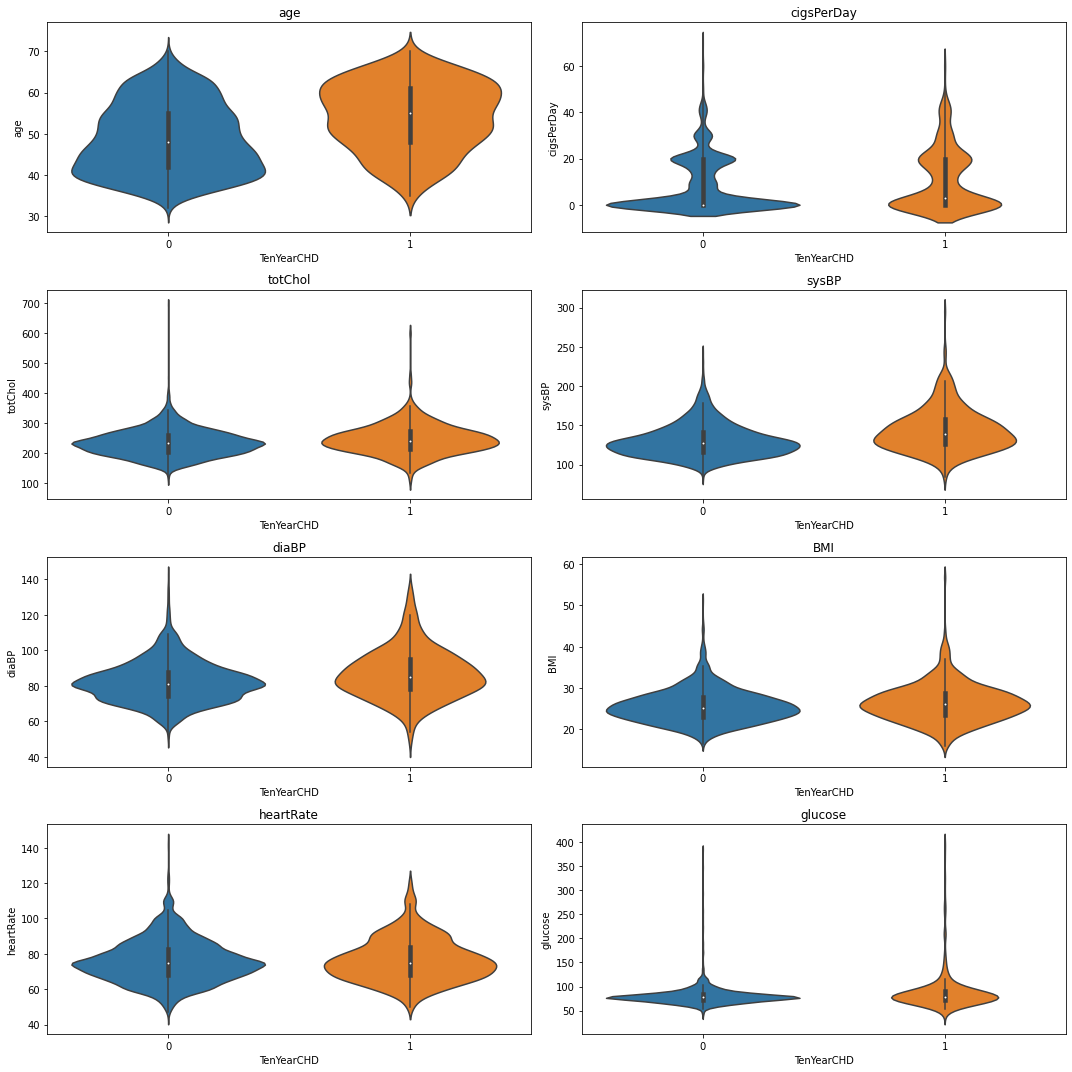

In [49]:
n=1
plt.figure(figsize=(15,15))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.violinplot(y=i,x='TenYearCHD',data=df)
  plt.title(i)
  plt.tight_layout()

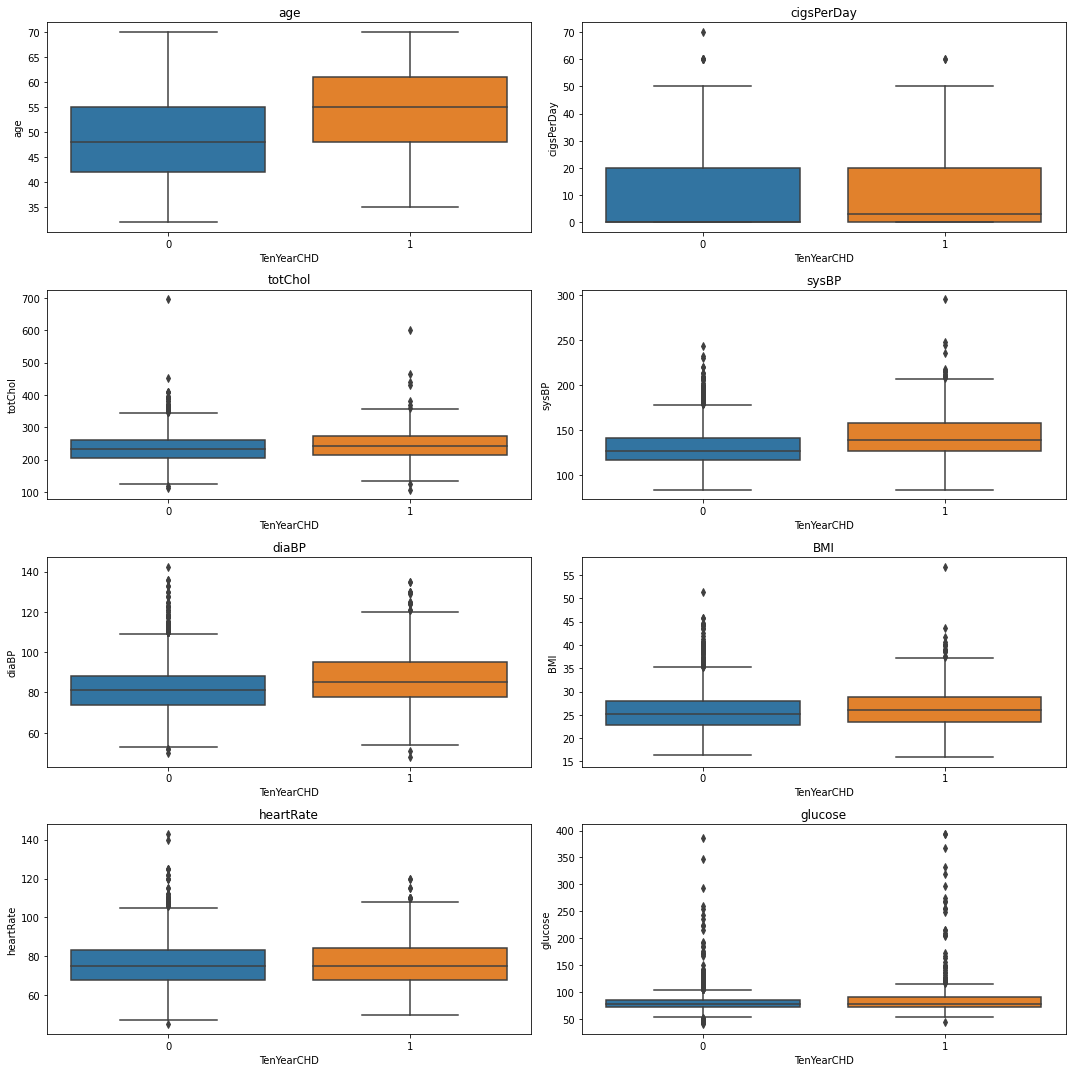

In [50]:
n=1
plt.figure(figsize=(15,15))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.boxplot(y=i,x='TenYearCHD',data=df)
  plt.title(i)
  plt.tight_layout()

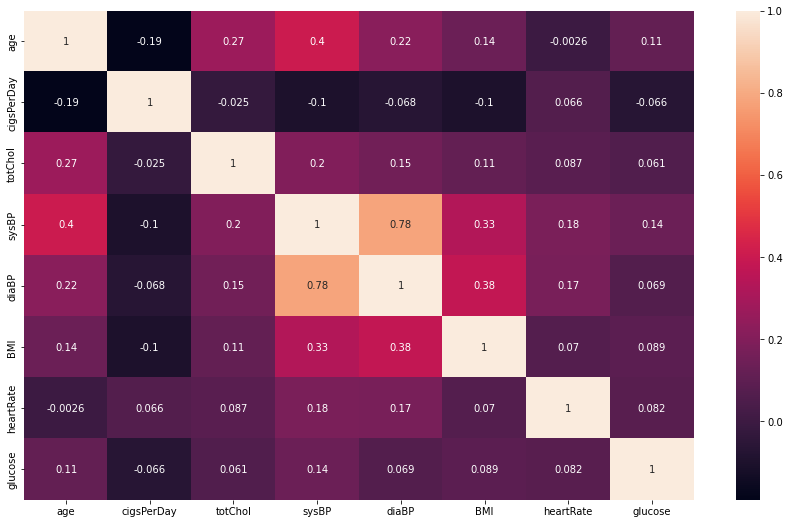

In [51]:
plt.figure(figsize=(15,9))
sns.heatmap(df[continous_features].corr(),annot=True)

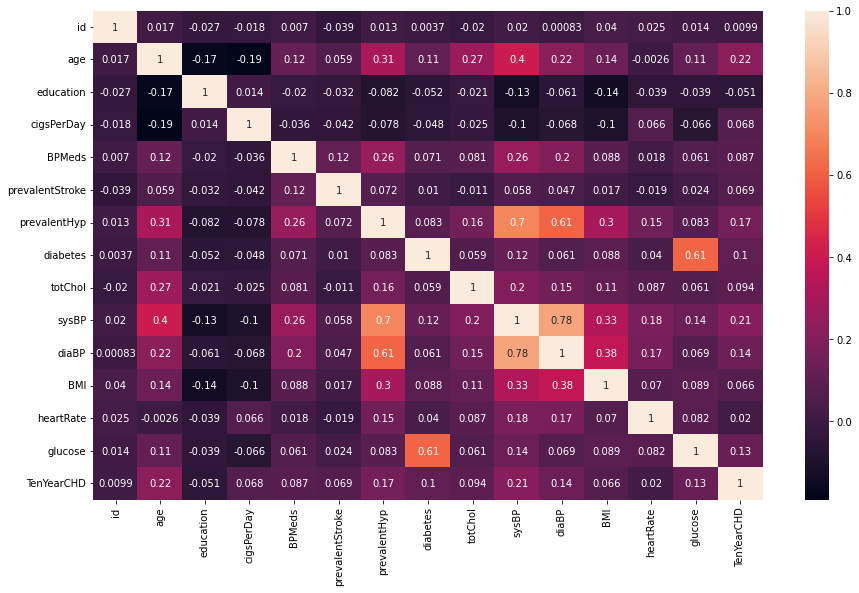

In [52]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

In [53]:
continous_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [54]:
nominal_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [55]:
df['pulse']=df['sysBP']-df['diaBP']


In [56]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulse'],
      dtype='object')

In [57]:
df.drop(columns=['diaBP','sysBP','diabetes','prevalentHyp'],axis=1,inplace=True)

In [58]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'pulse'],
      dtype='object')

In [59]:
df['sex']=df['sex'].apply(lambda x:1 if x=='M' else 1)
df['is_smoking']=df['is_smoking'].apply(lambda x:1 if x=='YES' else 0)

In [60]:
df.drop(columns=['is_smoking'],axis=1,inplace=True)

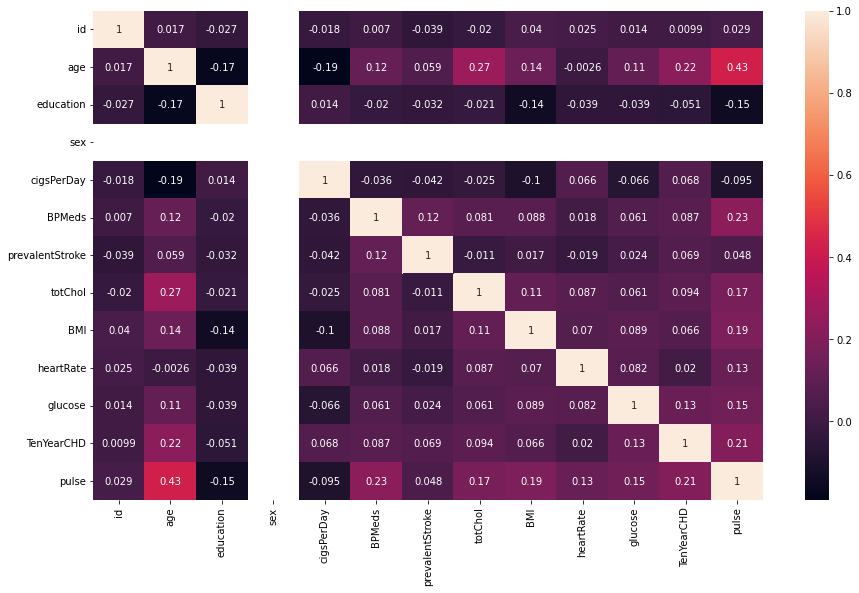

In [61]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

In [62]:
df_new=df[['age', 'education', 'sex', 'cigsPerDay', 'BPMeds','prevalentStroke', 'totChol','BMI', 'heartRate', 'glucose','TenYearCHD','pulse']]

In [63]:
X=df_new[['age', 'education', 'sex','cigsPerDay', 'BPMeds','prevalentStroke', 'totChol','BMI', 'heartRate', 'glucose','pulse']]
Y=df_new['TenYearCHD']

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X.iloc[:,:], Y)

print('Original dataset shape', len(Y))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [65]:
y_smote.value_counts().tolist()

[2879, 2879]

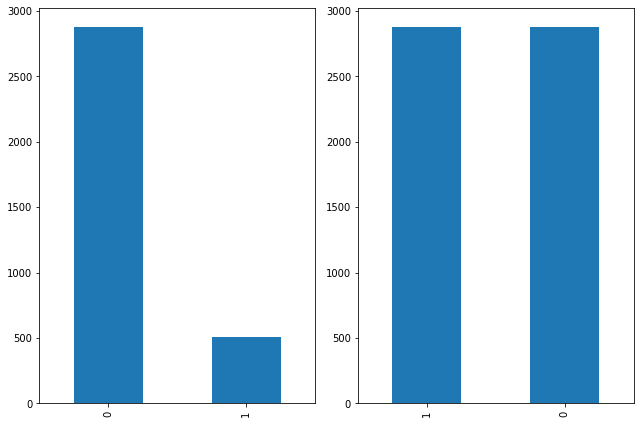

In [66]:
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
Y.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
y_smote.value_counts().plot(kind='bar')
plt.tight_layout()




([<matplotlib.patches.Wedge at 0x7f7bd6df5ad0>,
 [Text(-1.1, 1.3471114790620887e-16, '1'),
  Text(1.1500000000000001, -2.816687638038913e-16, '0')],
 [Text(-0.6, 7.347880794884119e-17, '50.0%'),
  Text(0.65, -1.592040838891559e-16, '50.0%')])

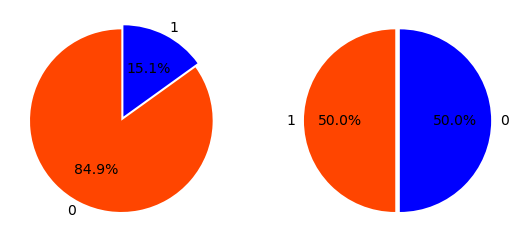

In [67]:
plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
labels = Y.value_counts().index.tolist()
sizes = Y.value_counts().tolist()
explode = (0, 0.05)
colors = ['orangered', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})

plt.subplot(1,2,2)

labels = y_smote.value_counts().index.tolist()
sizes = y_smote.value_counts().tolist()
explode = (0, 0.05)
colors = ['orangered', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})


In [68]:
x_smote.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,totChol,BMI,heartRate,glucose,pulse
0,64,2.0,1,3.0,0.0,0,221.0,25.38,90.0,80.0,63.0
1,36,4.0,1,0.0,0.0,0,212.0,29.77,72.0,75.0,70.0
2,46,1.0,1,10.0,0.0,0,250.0,20.35,88.0,94.0,45.0
3,50,1.0,1,20.0,0.0,0,233.0,28.26,68.0,94.0,70.0
4,64,1.0,1,30.0,0.0,0,241.0,26.42,70.0,77.0,51.5


In [69]:
x_smote.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'totChol', 'BMI', 'heartRate', 'glucose', 'pulse'],
      dtype='object')

In [70]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x_smote,y_smote , test_size = 0.25, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4318, 11)
(1440, 11)


In [71]:
y_test.value_counts()

1    745
0    695
Name: TenYearCHD, dtype: int64

In [72]:
scaler = MinMaxScaler()
X_train[['cigsPerDay','age','totChol', 'BMI', 'heartRate', 'glucose','pulse']] = scaler.fit_transform(X_train[['cigsPerDay','age','totChol', 'BMI', 'heartRate', 'glucose', 'pulse']])
X_test[['cigsPerDay','age','totChol','BMI', 'heartRate', 'glucose', 'pulse']] = scaler.transform(X_test[['cigsPerDay','age','totChol', 'BMI', 'heartRate', 'glucose','pulse']])

In [73]:
X_train.head(5)

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,totChol,BMI,heartRate,glucose,pulse
5547,0.526316,1.452405,1,0.116333,0.547595,0,0.557159,0.207923,0.567419,0.118040,0.394880
5252,0.473684,1.861286,1,0.285714,0.000000,0,0.366635,0.119205,0.593310,0.086705,0.110773
2761,0.315789,1.000000,1,0.214286,0.000000,0,0.212224,0.279628,0.315789,0.107345,0.159820
1590,0.526316,2.000000,1,0.000000,0.000000,0,0.183362,0.210578,0.136842,0.237288,0.581163
628,0.763158,1.000000,1,0.000000,0.000000,0,0.249576,0.383692,0.368421,0.141243,0.443137


In [154]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight='balanced',fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)
THRESOLD=0.3
preds=np.where(clf.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.600000
recall,0.924832
precision,0.569892
roc_auc_score,0.588315


In [155]:
clf.coef_

array([[ 2.54965107e+00, -3.37473843e-02, -1.38232487e-03,
         2.05529916e+00,  7.71045620e-01, -5.68046617e-01,
         1.30046384e+00,  4.51552852e-01, -2.73168684e-01,
         2.40874784e+00,  2.33428113e+00]])

In [156]:
clf.intercept_

array([-2.77264851])

In [157]:
np.unique(preds,return_counts=True)


(array([0, 1]), array([ 231, 1209]))

In [158]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([695, 745]))

In [159]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[175 520]
 [ 56 689]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

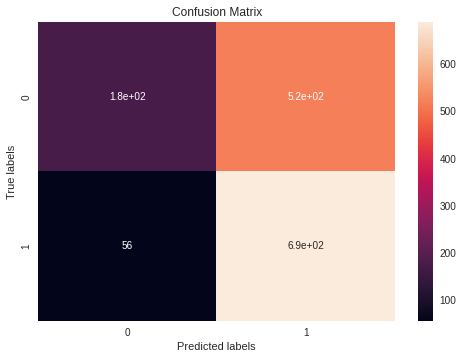

In [160]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

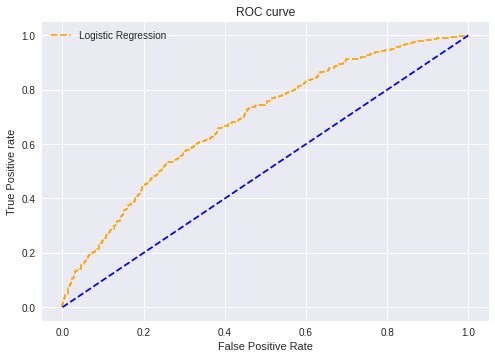

In [113]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()


Best Threshold=0.506845, G-Mean=0.664


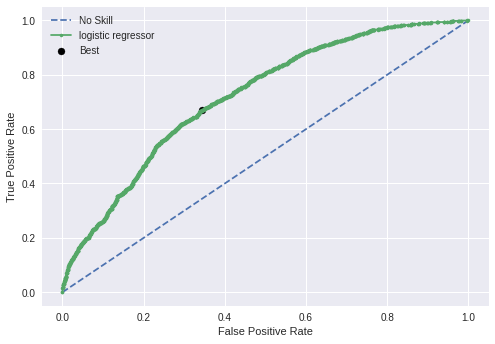

In [161]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_train,clf.predict_proba(X_train)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='logistic regressor' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [152]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2,weights='distance')
classifier.fit(X_train, y_train)
THRESOLD=0.33
preds=np.where(classifier.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.824306
recall,0.944966
precision,0.768559
roc_auc_score,0.819965


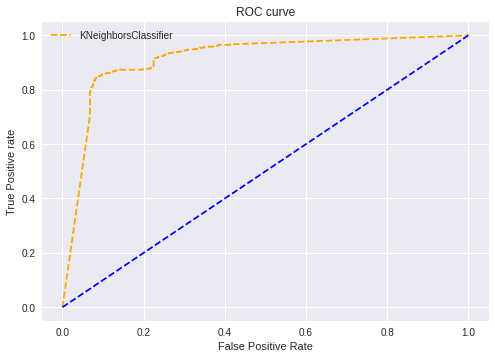

In [141]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, classifier.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='KNeighborsClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Best Threshold=0.304536, G-Mean=0.881


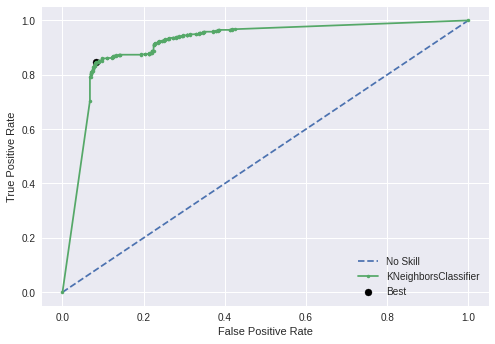

In [153]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,classifier.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='KNeighborsClassifier' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [133]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2,weights='uniform')
classifier.fit(X_train, y_train)
THRESOLD=0.3
preds=np.where(classifier.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.786111
recall,0.970470
precision,0.716551
roc_auc_score,0.779480


In [134]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[409 286]
 [ 22 723]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

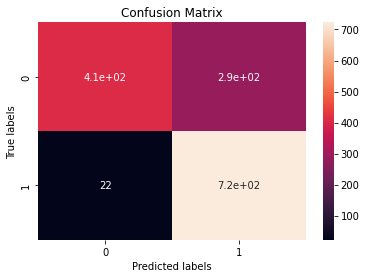

In [135]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [142]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = [3,5,7,9]
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [144]:
grid.best_params_

{'n_neighbors': 3}

In [146]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [147]:
THRESOLD=0.33
preds=np.where(classifier.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.824306
recall,0.944966
precision,0.768559
roc_auc_score,0.819965


In [148]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[483 212]
 [ 41 704]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

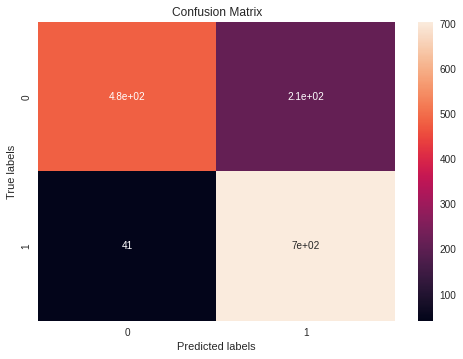

In [149]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

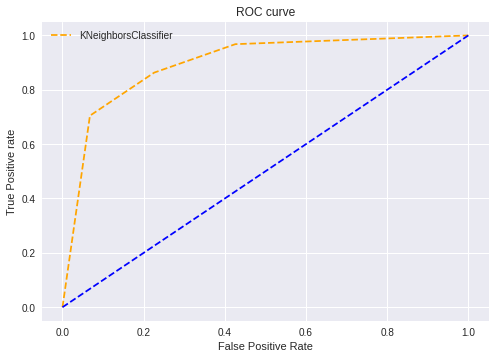

In [150]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, grid.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='KNeighborsClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Best Threshold=0.333333, G-Mean=0.817


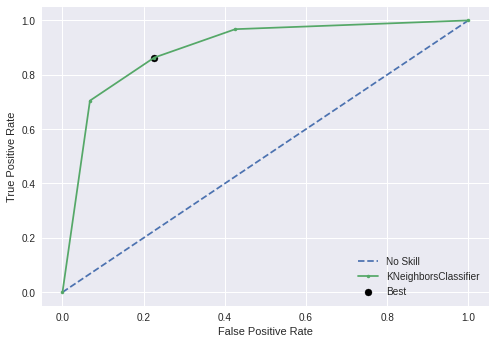

In [151]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,grid.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='KNeighborsClassifier' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [129]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [130]:
logistic = LogisticRegression()

In [131]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.661, test=0.654) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.665, test=0.648) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.662, test=0.660) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.655, test=0.683) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.660, test=0.660) total time=   0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [132]:
scores['train_accuracy']

array([0.66097279, 0.66502606, 0.66155182, 0.65470333, 0.65991317])

In [133]:
scores['test_accuracy']

array([0.65393519, 0.64814815, 0.65972222, 0.6825029 , 0.66048667])

In [162]:
clf = svm.SVC(kernel='linear', C=10000,probability=True)
clf.fit(X_train,y_train)

SVC(C=10000, kernel='linear', probability=True)

In [163]:
THRESOLD=0.333
preds=np.where(classifier.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.827778
recall,0.944966
precision,0.772777
roc_auc_score,0.823562


In [164]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[488 207]
 [ 41 704]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

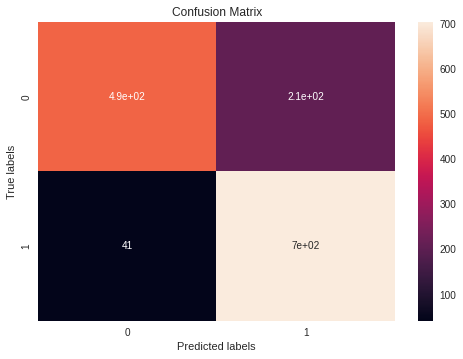

In [165]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

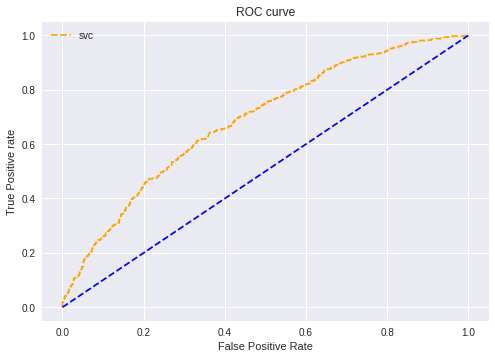

In [166]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='svc')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Best Threshold=0.500000, G-Mean=0.640


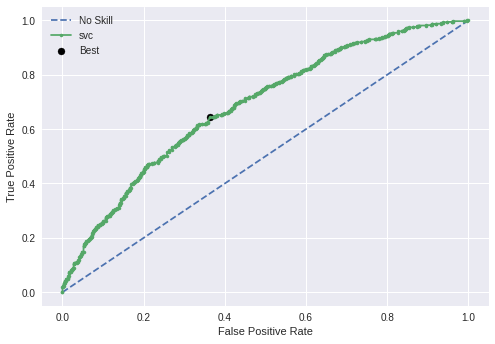

In [167]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='svc' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [168]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
clf=svm.SVC(probability=True)
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   3.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   4.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   3.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   3.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.670 total time=   3.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.648 total time=   3.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.628 total time=   3.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.670 total time=   3.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   3.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.643 total time=   3.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.561 total time=   3.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [169]:
grid.best_estimator_

SVC(C=1000, gamma=1, probability=True)

In [170]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [182]:
THRESOLD=0.35
preds=np.where(grid.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.797917
recall,0.821477
precision,0.794805
roc_auc_score,0.797069


In [183]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[537 158]
 [133 612]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

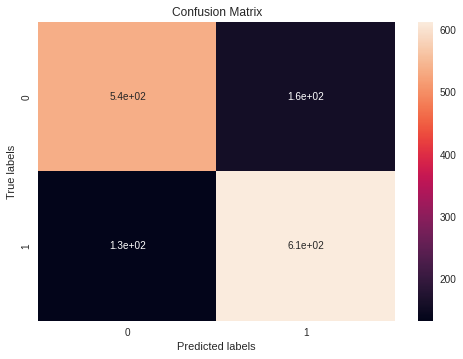

In [184]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Best Threshold=0.592735, G-Mean=0.817


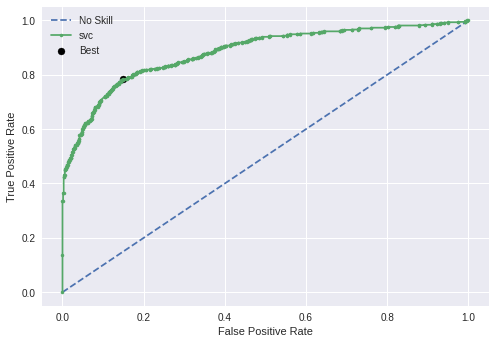

In [185]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,grid.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='svc' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [210]:
# Define and fit the model
dt_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=18, random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, random_state=0)

In [211]:
THRESOLD=0.5
preds=np.where(dt_classifier.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.807639
recall,0.820134
precision,0.810345
roc_auc_score,0.807189
